#### Name : Shinde Rutuja Ajay 
#### Roll No : 23107120
#### Class :SY - B

# TOPIC : Solar-Aware Energy Decision Classifier

##### link : https://www.kaggle.com/datasets/albertovidalrod/electricity-consumption-uk-20092022

# Import Required Libraries and Load the Dataset

In [209]:
import pandas as pd

In [210]:
import numpy as np

In [213]:
import matplotlib.pyplot as plt

In [214]:
import seaborn as sns

In [216]:
df = pd.read_csv("../Rutuja/Downloads/historic_demand_2009_2024_data.csv" )

In [218]:
df

Unnamed: 0 settlement_date  settlement_period     nd    tsd  \
0                0        1/1/2009                  1  37910  38704   
1                1        1/1/2009                  2  38047  38964   
2                2        1/1/2009                  3  37380  38651   
3                3        1/1/2009                  4  36426  37775   
4                4        1/1/2009                  5  35687  37298   
...            ...             ...                ...    ...    ...   
279259      279259       12/5/2024                 44  29114  31431   
279260      279260       12/5/2024                 45  27204  29846   
279261      279261       12/5/2024                 46  26006  28805   
279262      279262       12/5/2024                 47  23908  26825   
279263      279263       12/5/2024                 48  23217  26133   

        england_wales_demand  embedded_wind_generation  \
0                      33939                        54   
1                      34072                        53   
2                      33615                        53   
3                      32526                        50   
4                      31877                        50   
...                      ...                       ...   
279259                 27212                      5377   
279260                 25477                      5486   
279261                 24428                      5594   
279262                 22590                      5575   
279263                 21958                      5556   

        embedded_wind_capacity  embedded_solar_generation  \
0                         1403                          0   
1                         1403                          0   
2                         1403                          0   
3                         1403                          0   
4                         1403                          0   
...                        ...                        ...   
279259                    6622                      42869   
279260                    6622                      40080   
279261                    6622                      41649   
279262                    6622                      43565   
279263                    6622                      44622   

        embedded_solar_capacity  ...  britned_flow  moyle_flow  \
0                             0  ...             0        -161   
1                             0  ...             0        -160   
2                             0  ...             0        -160   
3                             0  ...             0        -160   
4                             0  ...             0        -160   
...                         ...  ...           ...         ...   
279259                    17194  ...          1003        -450   
279260                    17194  ...          1002        -450   
279261                    17194  ...           997        -450   
279262                    17194  ...           280        -450   
279263                    17194  ...           218        -450   

        east_west_flow  nemo_flow  nsl_flow  eleclink_flow  scottish_transfer  \
0                    0          0       NaN            NaN                NaN   
1                    0          0       NaN            NaN                NaN   
2                    0          0       NaN            NaN                NaN   
3                    0          0       NaN            NaN                NaN   
4                    0          0       NaN            NaN                NaN   
...                ...        ...       ...            ...                ...   
279259            -531        999    1397.0            0.0             4878.0   
279260            -531        949    1397.0            0.0             4849.0   
279261            -531        943    1376.0            0.0             4666.0   
279262            -522        338    1040.0            0.0             4771.0   
279263            -530        292     993

# Data Preprocessing 

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279264 entries, 0 to 279263
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 279264 non-null  int64  
 1   settlement_date            279264 non-null  object 
 2   settlement_period          279264 non-null  int64  
 3   nd                         279264 non-null  int64  
 4   tsd                        279264 non-null  int64  
 5   england_wales_demand       279264 non-null  int64  
 6   embedded_wind_generation   279264 non-null  int64  
 7   embedded_wind_capacity     279264 non-null  int64  
 8   embedded_solar_generation  279264 non-null  int64  
 9   embedded_solar_capacity    279264 non-null  int64  
 10  non_bm_stor                279264 non-null  int64  
 11  pump_storage_pumping       279264 non-null  int64  
 12  ifa_flow                   279264 non-null  int64  
 13  ifa2_flow                  27

In [222]:
df.shape

(279264, 24)

In [226]:
df.describe()

Unnamed: 0  settlement_period             nd            tsd  \
count  279264.000000      279264.000000  279264.000000  279264.000000   
mean   139631.500000          24.500229   31186.565042   32627.843779   
std     80616.717125          13.853821    7827.270027    7710.008440   
min         0.000000           1.000000   13367.000000       0.000000   
25%     69815.750000          12.750000   24908.000000   26582.000000   
50%    139631.500000          24.500000   30495.000000   31782.000000   
75%    209447.250000          36.250000   36913.000000   38096.000000   
max    279263.000000          50.000000   59095.000000   60147.000000   

       england_wales_demand  embedded_wind_generation  embedded_wind_capacity  \
count         279264.000000             279264.000000           279264.000000   
mean           28389.002868               1270.098774             4447.695772   
std             7087.628201                966.304596             1957.216235   
min                0.000000                  0.000000             1403.000000   
25%            22677.000000                551.000000             2102.000000   
50%            27756.000000               1016.000000             4831.000000   
75%            33615.000000               1726.000000             6527.000000   
max            53325.000000               5930.000000             6622.000000   

       embedded_solar_generation  embedded_solar_capacity    non_bm_stor  ...  \
count              279264.000000            279264.000000  279264.000000  ...   
mean                32651.064641              8685.163430       6.654220  ...   
std                 10455.115476              5875.188186      39.150778  ...   
min                     0.000000                 0.000000     -24.000000  ...   
25%                 24096.000000              2028.000000       0.000000  ...   
50%                 32390.000000             11503.000000       0.000000  ...   
75%                 41695.000000             13080.000000       0.000000  ...   
max                 49999.000000             17197.000000     893.000000  ...   

        britned_flow     moyle_flow  east_west_flow      nemo_flow  \
count  279264.000000  279264.000000   279264.000000  279264.000000   
mean      503.999842    -125.610222      -50.967919     175.876626   
std       541.490053     230.333166      262.941668     421.668169   
min     -1215.000000    -505.000000     -585.000000   -1023.000000   
25%         0.000000    -304.000000     -208.000000       0.000000   
50%       725.000000    -149.000000        0.000000       0.000000   
75%       994.000000      24.000000        0.000000     332.000000   
max      1143.000000     499.000000      504.000000    1033.000000   

            nsl_flow  eleclink_flow  scottish_transfer   viking_flow  \
count  103968.000000  103968.000000       33840.000000  33840.000000   
mean      416.582977     114.173929        1704.910757    196.312145   
std       650.866003     490.431568        1825.530303    562.922278   
min     -1455.000000   -1028.000000       -2851.000000  -1465.000000   
25%         0.000000       0.000000         267.750000      0.000000   
50%         0.000000       0.000000        1543.000000      0.000000   
75%      1095.000000      75.000000        3058.000000    512.000000   
max      1401.000000    1002.000000        6585.000000   1436.000000   

       greenlink_flow     is_holiday  
count         16320.0  279264.000000  
mean              0.0       0.022516  
std               0.0       0.148356  
min               0.0       0.000000  
25%               0.0       0.000000  
50%               0.0       0.000000  
75%               0.0       0.000000  
max               0.0       1.000000  

[8 rows x 23 columns]

In [227]:
df.isnull()

Unnamed: 0  settlement_date  settlement_period     nd    tsd  \
0            False            False              False  False  False   
1            False            False              False  False  False   
2            False            False              False  False  False   
3            False            False              False  False  False   
4            False            False              False  False  False   
...            ...              ...                ...    ...    ...   
279259       False            False              False  False  False   
279260       False            False              False  False  False   
279261       False            False              False  False  False   
279262       False            False              False  False  False   
279263       False            False              False  False  False   

        england_wales_demand  embedded_wind_generation  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                      False                     False   
...                      ...                       ...   
279259                 False                     False   
279260                 False                     False   
279261                 False                     False   
279262                 False                     False   
279263                 False                     False   

        embedded_wind_capacity  embedded_solar_generation  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
...                        ...                        ...   
279259                   False                      False   
279260                   False                      False   
279261                   False                      False   
279262                   False                      False   
279263                   False                      False   

        embedded_solar_capacity  ...  britned_flow  moyle_flow  \
0                         False  ...         False       False   
1                         False  ...         False       False   
2                         False  ...         False       False   
3                         False  ...         False       False   
4                         False  ...         False       False   
...                         ...  ...           ...         ...   
279259                    False  ...         False       False   
279260                    False  ...         False       False   
279261                    False  ...         False       False   
279262                    False  ...         False       False   
279263                    False  ...         False       False   

        east_west_flow  nemo_flow  nsl_flow  eleclink_flow  scottish_transfer  \
0                False      False      True           True               True   
1                False      False      True           True               True   
2                False      False      True           True               True   
3                False      False      True           True               True   
4                False      False      True           True               True   
...                ...        ...       ...            ...                ...   
279259           False      False     False          False              False   
279260           False      False     False          False              False   
279261           False      False     False          False              False   
279262           False      False     False          False              False   
279263           False      F

In [230]:
df.isnull().sum()

Unnamed: 0                        0
settlement_date                   0
settlement_period                 0
nd                                0
tsd                               0
england_wales_demand              0
embedded_wind_generation          0
embedded_wind_capacity            0
embedded_solar_generation         0
embedded_solar_capacity           0
non_bm_stor                       0
pump_storage_pumping              0
ifa_flow                          0
ifa2_flow                         0
britned_flow                      0
moyle_flow                        0
east_west_flow                    0
nemo_flow                         0
nsl_flow                     175296
eleclink_flow                175296
scottish_transfer            245424
viking_flow                  245424
greenlink_flow               262944
is_holiday                        0
dtype: int64

In [232]:
df.drop(columns=["Unnamed: 0", "nsl_flow",'greenlink_flow',"scottish_transfer","eleclink_flow" , "greenlink_flow", "nd",'viking_flow', "tsd", "ifa_flow", "ifa2_flow", "britned_flow", "moyle_flow", "nemo_flow" ], inplace=True, errors="ignore")


In [234]:
df

settlement_date  settlement_period  england_wales_demand  \
0             1/1/2009                  1                 33939   
1             1/1/2009                  2                 34072   
2             1/1/2009                  3                 33615   
3             1/1/2009                  4                 32526   
4             1/1/2009                  5                 31877   
...                ...                ...                   ...   
279259       12/5/2024                 44                 27212   
279260       12/5/2024                 45                 25477   
279261       12/5/2024                 46                 24428   
279262       12/5/2024                 47                 22590   
279263       12/5/2024                 48                 21958   

        embedded_wind_generation  embedded_wind_capacity  \
0                             54                    1403   
1                             53                    1403   
2                             53                    1403   
3                             50                    1403   
4                             50                    1403   
...                          ...                     ...   
279259                      5377                    6622   
279260                      5486                    6622   
279261                      5594                    6622   
279262                      5575                    6622   
279263                      5556                    6622   

        embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
279259                      42869                    17194            0   
279260                      40080                    17194            0   
279261                      41649                    17194            0   
279262                      43565                    17194            0   
279263                      44622                    17194            0   

        pump_storage_pumping  east_west_flow  is_holiday  
0                         33               0           1  
1                        157               0           1  
2                        511               0           1  
3                        589               0           1  
4                        851               0           1  
...                      ...             ...         ...  
279259                   736            -531           0  
279260                   868            -531           0  
279261                   944            -531           0  
279262                   864            -522           0  
279263                   820            -530           0  

[279264 rows x 11 columns]

In [236]:
df.shape

(279264, 11)

In [592]:
df.size

3351168

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279264 entries, 0 to 279263
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            279264 non-null  object
 1   settlement_period          279264 non-null  int64 
 2   england_wales_demand       279264 non-null  int64 
 3   embedded_wind_generation   279264 non-null  int64 
 4   embedded_wind_capacity     279264 non-null  int64 
 5   embedded_solar_generation  279264 non-null  int64 
 6   embedded_solar_capacity    279264 non-null  int64 
 7   non_bm_stor                279264 non-null  int64 
 8   pump_storage_pumping       279264 non-null  int64 
 9   east_west_flow             279264 non-null  int64 
 10  is_holiday                 279264 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 23.4+ MB


In [240]:
df.isnull().sum()

settlement_date              0
settlement_period            0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
east_west_flow               0
is_holiday                   0
dtype: int64

In [242]:
df.dtypes

settlement_date              object
settlement_period             int64
england_wales_demand          int64
embedded_wind_generation      int64
embedded_wind_capacity        int64
embedded_solar_generation     int64
embedded_solar_capacity       int64
non_bm_stor                   int64
pump_storage_pumping          int64
east_west_flow                int64
is_holiday                    int64
dtype: object

In [244]:
df['settlement_date'] = pd.to_datetime(df['settlement_date'])  
df['settlement_date'] = df['settlement_date'].astype('int64') 

Text(0, 0.5, 'Energy')

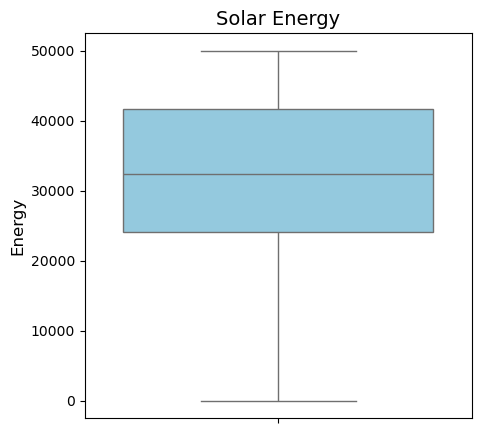

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['embedded_solar_generation'], color='skyblue')
plt.title('Solar Energy', fontsize=14)
plt.ylabel('Energy', fontsize=12)


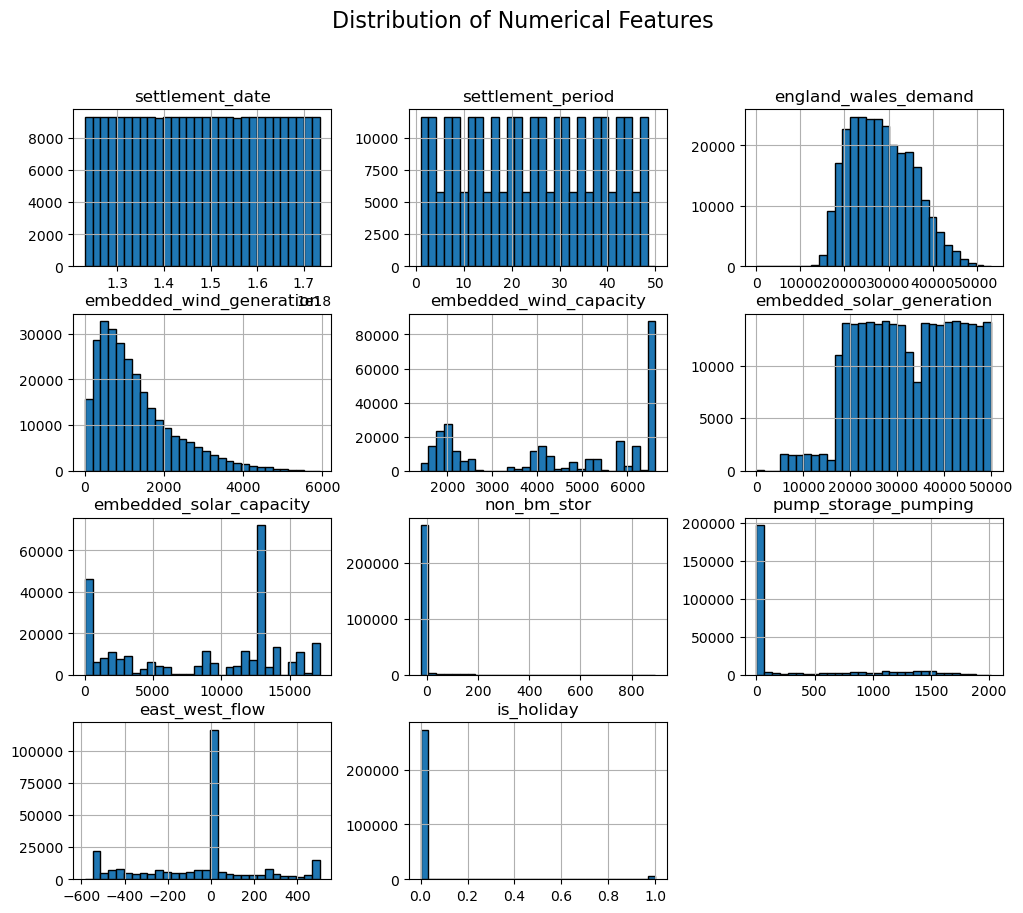

In [248]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

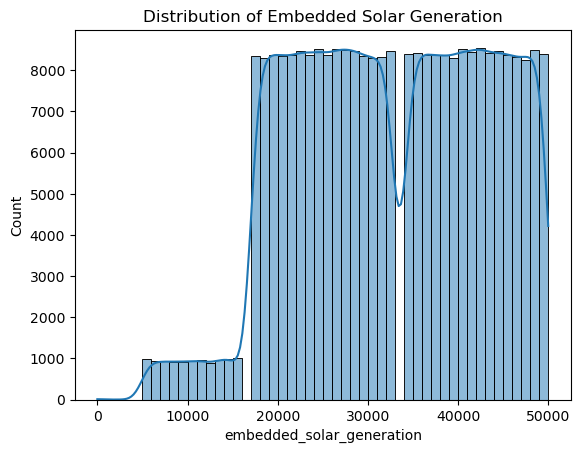

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["embedded_solar_generation"], bins=50, kde=True)
plt.title("Distribution of Embedded Solar Generation")
plt.show()


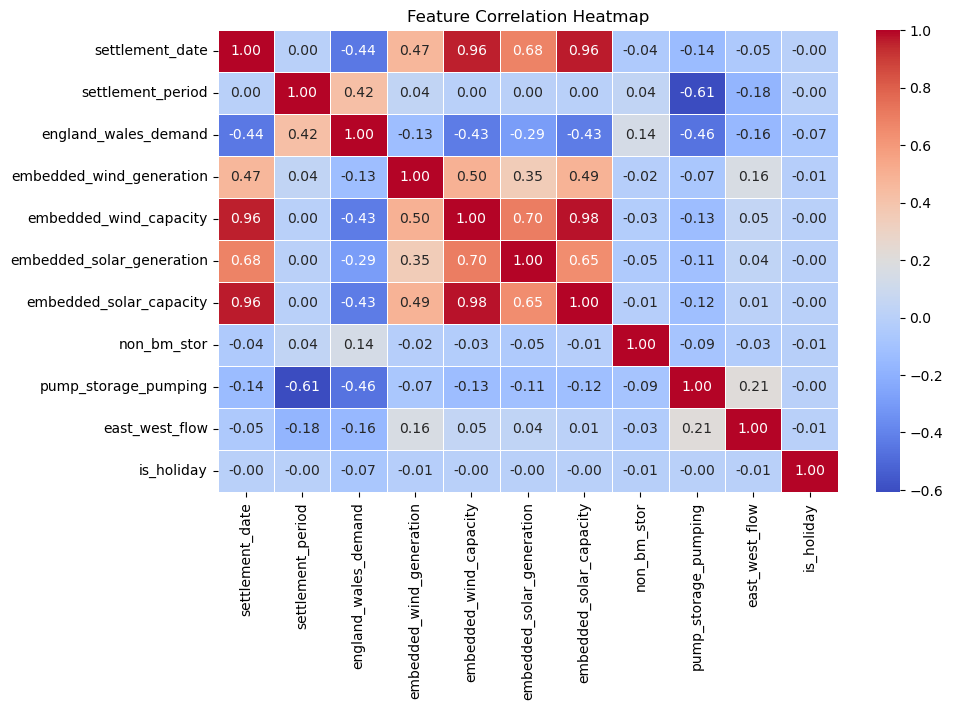

In [250]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

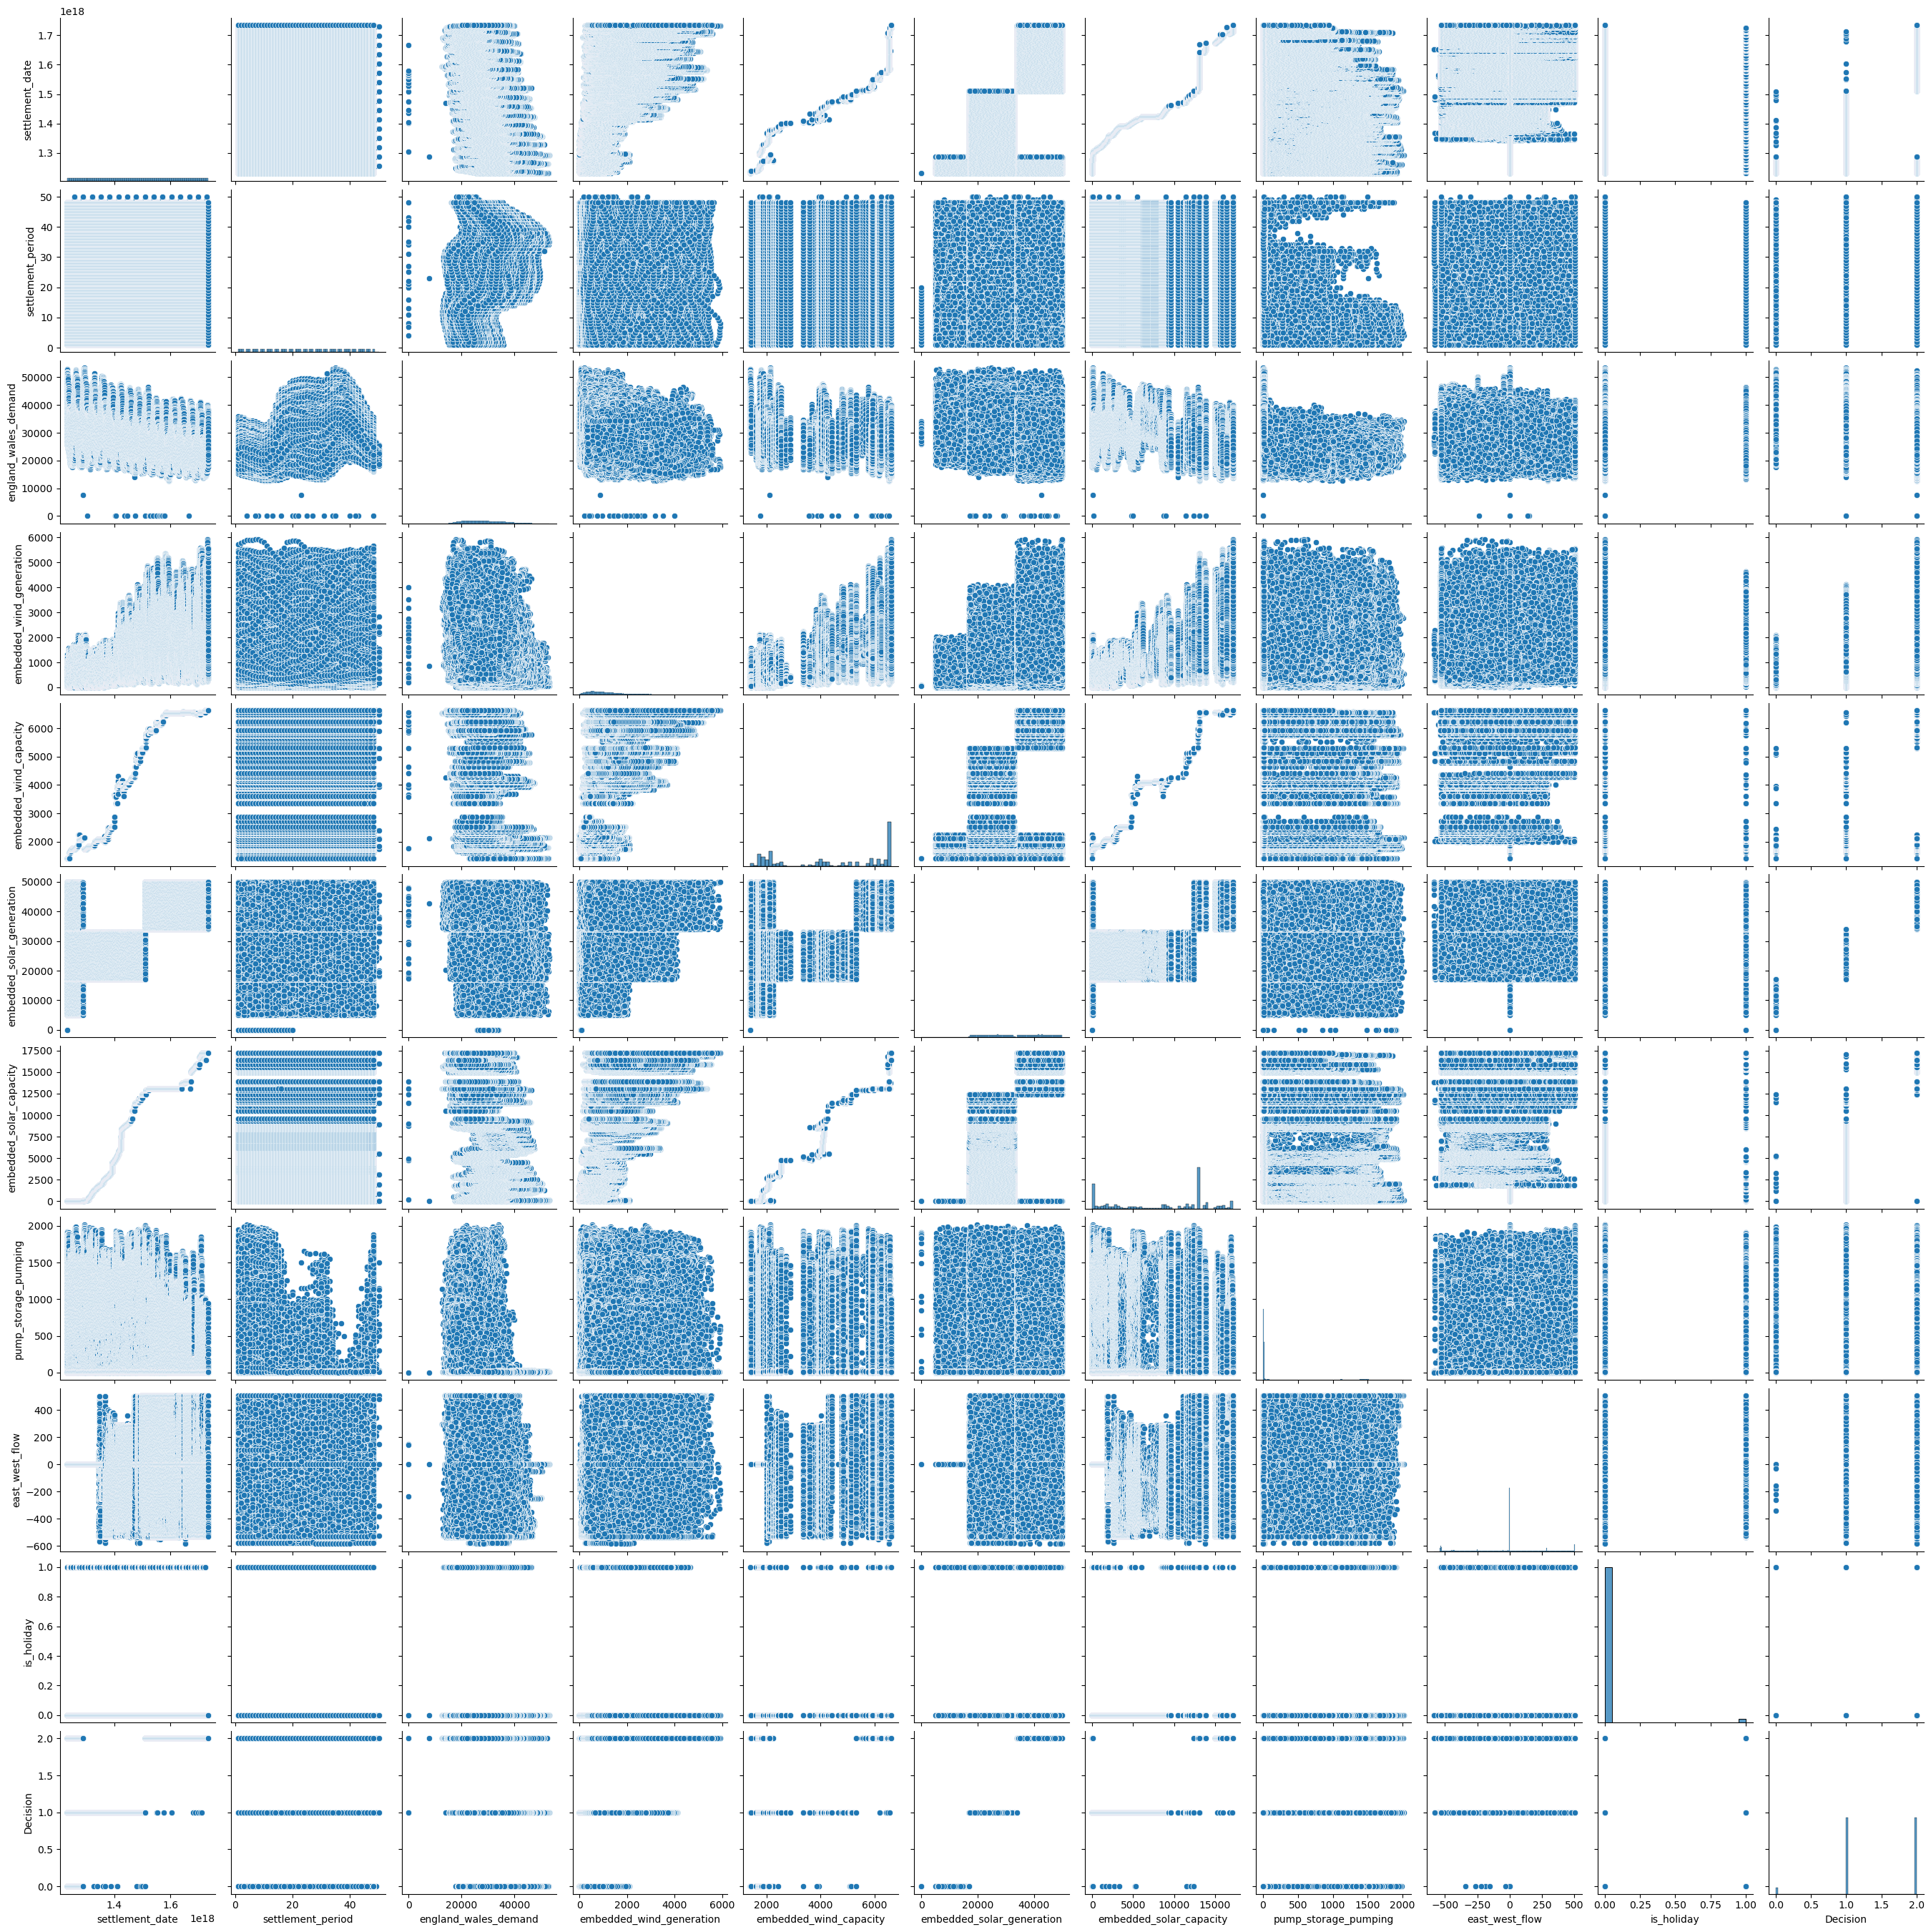

In [151]:
sns.pairplot(df)

In [252]:
df.isna().sum()

settlement_date              0
settlement_period            0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
east_west_flow               0
is_holiday                   0
dtype: int64

In [253]:
df['embedded_solar_generation'].max()

49999

In [254]:
df['embedded_solar_generation'].min()

0

In [255]:
max_speed = df['embedded_solar_generation'].max()  
bins = [0, 17000, 34000, max_speed + 1]  
bins = sorted(set(bins))  
labels = ["Store Energy", "Stable", "Sell Energy"]  

df["Decision"] = pd.cut(df["embedded_solar_generation"], bins=bins, labels=labels, include_lowest=True)



In [256]:
df

settlement_date  settlement_period  england_wales_demand  \
0       1230768000000000000                  1                 33939   
1       1230768000000000000                  2                 34072   
2       1230768000000000000                  3                 33615   
3       1230768000000000000                  4                 32526   
4       1230768000000000000                  5                 31877   
...                     ...                ...                   ...   
279259  1733356800000000000                 44                 27212   
279260  1733356800000000000                 45                 25477   
279261  1733356800000000000                 46                 24428   
279262  1733356800000000000                 47                 22590   
279263  1733356800000000000                 48                 21958   

        embedded_wind_generation  embedded_wind_capacity  \
0                             54                    1403   
1                             53                    1403   
2                             53                    1403   
3                             50                    1403   
4                             50                    1403   
...                          ...                     ...   
279259                      5377                    6622   
279260                      5486                    6622   
279261                      5594                    6622   
279262                      5575                    6622   
279263                      5556                    6622   

        embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
279259                      42869                    17194            0   
279260                      40080                    17194            0   
279261                      41649                    17194            0   
279262                      43565                    17194            0   
279263                      44622                    17194            0   

        pump_storage_pumping  east_west_flow  is_holiday      Decision  
0                         33               0           1  Store Energy  
1                        157               0           1  Store Energy  
2                        511               0           1  Store Energy  
3                        589               0           1  Store Energy  
4                        851               0           1  Store Energy  
...                      ...             ...         ...           ...  
279259                   736            -531           0   Sell Energy  
279260                   868            -531           0   Sell Energy  
279261                   944            -531           0   Sell Energy  
279262                   864            -522           0   Sell Energy  
279263                   820            -530           0   Sell Energy  

[279264 rows x 12 columns]

In [257]:
df['Decision'].replace(["Store Energy", "Stable", "Sell Energy"],[1,2,3],inplace=True)

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_10128\2357120987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Decision'].replace(["Store Energy", "Stable", "Sell Energy"],[1,2,3],inplace=True)
C:\Users\Rutuja\AppData\Local\Temp\ipykernel_10128\2357120987.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [258]:
df 

settlement_date  settlement_period  england_wales_demand  \
0       1230768000000000000                  1                 33939   
1       1230768000000000000                  2                 34072   
2       1230768000000000000                  3                 33615   
3       1230768000000000000                  4                 32526   
4       1230768000000000000                  5                 31877   
...                     ...                ...                   ...   
279259  1733356800000000000                 44                 27212   
279260  1733356800000000000                 45                 25477   
279261  1733356800000000000                 46                 24428   
279262  1733356800000000000                 47                 22590   
279263  1733356800000000000                 48                 21958   

        embedded_wind_generation  embedded_wind_capacity  \
0                             54                    1403   
1                             53                    1403   
2                             53                    1403   
3                             50                    1403   
4                             50                    1403   
...                          ...                     ...   
279259                      5377                    6622   
279260                      5486                    6622   
279261                      5594                    6622   
279262                      5575                    6622   
279263                      5556                    6622   

        embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
279259                      42869                    17194            0   
279260                      40080                    17194            0   
279261                      41649                    17194            0   
279262                      43565                    17194            0   
279263                      44622                    17194            0   

        pump_storage_pumping  east_west_flow  is_holiday Decision  
0                         33               0           1        1  
1                        157               0           1        1  
2                        511               0           1        1  
3                        589               0           1        1  
4                        851               0           1        1  
...                      ...             ...         ...      ...  
279259                   736            -531           0        3  
279260                   868            -531           0        3  
279261                   944            -531           0        3  
279262                   864            -522           0        3  
279263                   820            -530           0        3  

[279264 rows x 12 columns]

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_10128\3305500325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Decision"], palette="viridis")


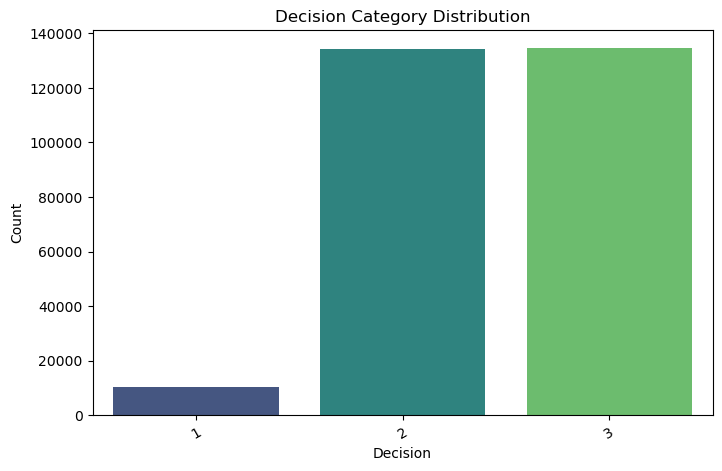

In [259]:
# Bar Chart 
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Decision"], palette="viridis")
plt.title("Decision Category Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


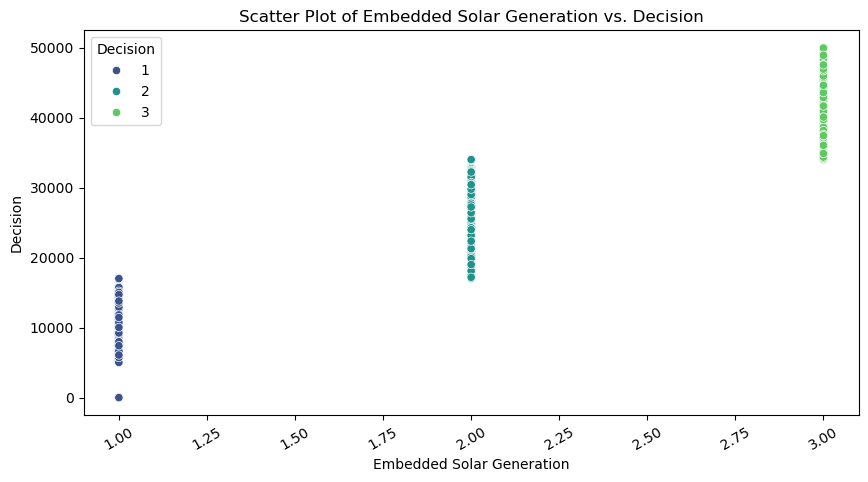

In [260]:
plt.figure(figsize=(10, 5))
sns.scatterplot(y=df["embedded_solar_generation"], x=df["Decision"], hue=df["Decision"], palette="viridis")
plt.title("Scatter Plot of Embedded Solar Generation vs. Decision")
plt.xlabel("Embedded Solar Generation")
plt.ylabel("Decision")
plt.xticks(rotation=30)
plt.show()


In [261]:
df

settlement_date  settlement_period  england_wales_demand  \
0       1230768000000000000                  1                 33939   
1       1230768000000000000                  2                 34072   
2       1230768000000000000                  3                 33615   
3       1230768000000000000                  4                 32526   
4       1230768000000000000                  5                 31877   
...                     ...                ...                   ...   
279259  1733356800000000000                 44                 27212   
279260  1733356800000000000                 45                 25477   
279261  1733356800000000000                 46                 24428   
279262  1733356800000000000                 47                 22590   
279263  1733356800000000000                 48                 21958   

        embedded_wind_generation  embedded_wind_capacity  \
0                             54                    1403   
1                             53                    1403   
2                             53                    1403   
3                             50                    1403   
4                             50                    1403   
...                          ...                     ...   
279259                      5377                    6622   
279260                      5486                    6622   
279261                      5594                    6622   
279262                      5575                    6622   
279263                      5556                    6622   

        embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
279259                      42869                    17194            0   
279260                      40080                    17194            0   
279261                      41649                    17194            0   
279262                      43565                    17194            0   
279263                      44622                    17194            0   

        pump_storage_pumping  east_west_flow  is_holiday Decision  
0                         33               0           1        1  
1                        157               0           1        1  
2                        511               0           1        1  
3                        589               0           1        1  
4                        851               0           1        1  
...                      ...             ...         ...      ...  
279259                   736            -531           0        3  
279260                   868            -531           0        3  
279261                   944            -531           0        3  
279262                   864            -522           0        3  
279263                   820            -530           0        3  

[279264 rows x 12 columns]

# Logistic Regression (Model 1)

In [263]:
df

settlement_date  settlement_period  england_wales_demand  \
0       1230768000000000000                  1                 33939   
1       1230768000000000000                  2                 34072   
2       1230768000000000000                  3                 33615   
3       1230768000000000000                  4                 32526   
4       1230768000000000000                  5                 31877   
...                     ...                ...                   ...   
279259  1733356800000000000                 44                 27212   
279260  1733356800000000000                 45                 25477   
279261  1733356800000000000                 46                 24428   
279262  1733356800000000000                 47                 22590   
279263  1733356800000000000                 48                 21958   

        embedded_wind_generation  embedded_wind_capacity  \
0                             54                    1403   
1                             53                    1403   
2                             53                    1403   
3                             50                    1403   
4                             50                    1403   
...                          ...                     ...   
279259                      5377                    6622   
279260                      5486                    6622   
279261                      5594                    6622   
279262                      5575                    6622   
279263                      5556                    6622   

        embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
279259                      42869                    17194            0   
279260                      40080                    17194            0   
279261                      41649                    17194            0   
279262                      43565                    17194            0   
279263                      44622                    17194            0   

        pump_storage_pumping  east_west_flow  is_holiday Decision  
0                         33               0           1        1  
1                        157               0           1        1  
2                        511               0           1        1  
3                        589               0           1        1  
4                        851               0           1        1  
...                      ...             ...         ...      ...  
279259                   736            -531           0        3  
279260                   868            -531           0        3  
279261                   944            -531           0        3  
279262                   864            -522           0        3  
279263                   820            -530           0        3  

[279264 rows x 12 columns]

In [264]:
X = df.drop(columns=["Decision", "settlement_date"])
y = df["Decision"]

In [265]:
X

settlement_period  england_wales_demand  embedded_wind_generation  \
0                       1                 33939                        54   
1                       2                 34072                        53   
2                       3                 33615                        53   
3                       4                 32526                        50   
4                       5                 31877                        50   
...                   ...                   ...                       ...   
279259                 44                 27212                      5377   
279260                 45                 25477                      5486   
279261                 46                 24428                      5594   
279262                 47                 22590                      5575   
279263                 48                 21958                      5556   

        embedded_wind_capacity  embedded_solar_generation  \
0                         1403                          0   
1                         1403                          0   
2                         1403                          0   
3                         1403                          0   
4                         1403                          0   
...                        ...                        ...   
279259                    6622                      42869   
279260                    6622                      40080   
279261                    6622                      41649   
279262                    6622                      43565   
279263                    6622                      44622   

        embedded_solar_capacity  non_bm_stor  pump_storage_pumping  \
0                             0            0                    33   
1                             0            0                   157   
2                             0            0                   511   
3                             0            0                   589   
4                             0            0                   851   
...                         ...          ...                   ...   
279259                    17194            0                   736   
279260                    17194            0                   868   
279261                    17194            0                   944   
279262                    17194            0                   864   
279263                    17194            0                   820   

        east_west_flow  is_holiday  
0                    0           1  
1                    0           1  
2                    0           1  
3                    0           1  
4                    0           1  
...                ...         ...  
279259            -531           0  
279260            -531           0  
279261            -531           0  
279262            -522           0  
279263            -530           0  

[279264 rows x 10 columns]

In [266]:
y

0         1
1         1
2         1
3         1
4         1
         ..
279259    3
279260    3
279261    3
279262    3
279263    3
Name: Decision, Length: 279264, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [268]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)


C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [269]:
y_pred=model1.predict(X_test)

In [270]:
y_pred

array([3, 2, 2, ..., 3, 1, 3], dtype=int64)

In [271]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [273]:
accuracy

0.9354018584498595

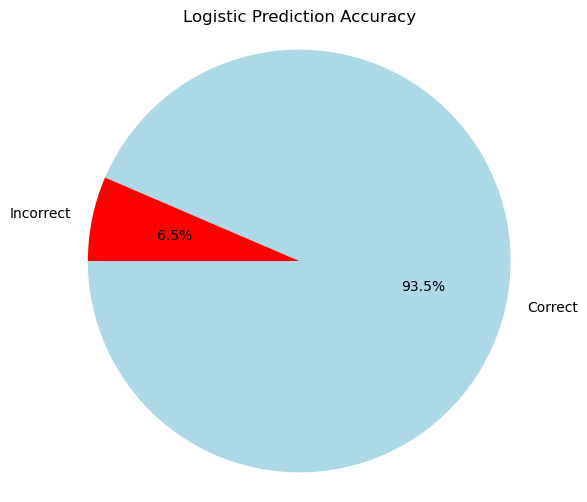

In [275]:
correct = sum(y_test == y_pred)
incorrect = len(y_test) - correct

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['lightblue', 'red']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Logistic Prediction Accuracy')
plt.axis('equal')  
plt.show()


In [276]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 

In [277]:
cm

array([[ 1976,   109,     0],
       [   79, 24872,  1923],
       [    0,  1497, 25397]], dtype=int64)

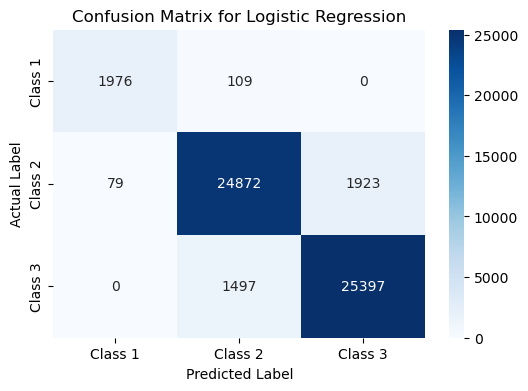

In [278]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [290]:
from sklearn.metrics import precision_score 
precision =precision_score(y_test,y_pred,average='macro')

In [291]:
precision

0.9435050185056012

In [300]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test,y_pred,average='macro')

In [301]:
recall

0.9391876847319081

In [302]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="macro")

In [303]:
f1

0.9412932349296269

In [304]:
from sklearn.metrics import classification_report 
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           1       0.96      0.95      0.95      2085
           2       0.94      0.93      0.93     26874
           3       0.93      0.94      0.94     26894

    accuracy                           0.94     55853
   macro avg       0.94      0.94      0.94     55853
weighted avg       0.94      0.94      0.94     55853



# Gaussian Naive-Bayes (Model 2)

In [547]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB() 

In [548]:
model2

GaussianNB()

In [551]:
model2.fit(X_train,y_train)

GaussianNB()

In [552]:
y_pred = model2.predict(X_test)

In [554]:
y_pred

array([2, 2, 1, ..., 3, 2, 2], dtype=int64)

In [557]:
model2.score(X_test,y_pred)

1.0

In [559]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [561]:
accuracy

0.9116072547580255

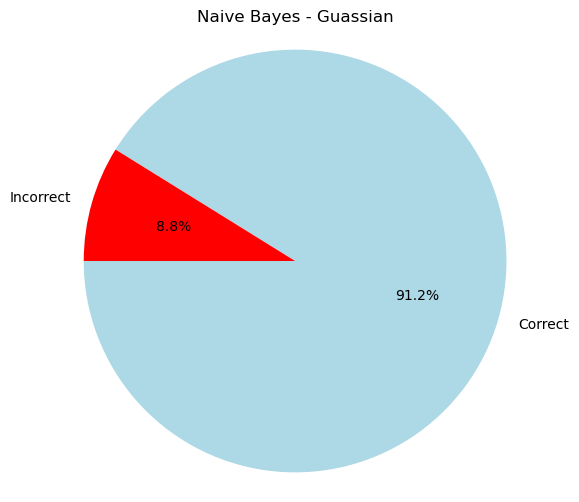

In [563]:
correct = sum(y_test == y_pred)
incorrect = len(y_test) - correct

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['lightblue', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Naive Bayes - Guassian')
plt.axis('equal') 
plt.show()


In [565]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 

In [567]:
cm

array([[ 1980,    16,     0],
       [ 2117, 23703,   834],
       [    0,  1970, 25233]], dtype=int64)

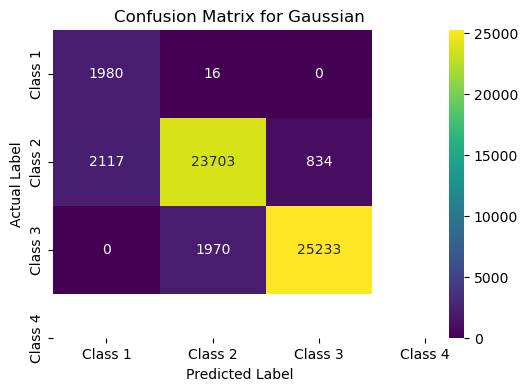

In [571]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis"	, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Gaussian")
plt.show()

In [578]:
from sklearn.metrics import precision_score 
precision =precision_score(y_test,y_pred,average='macro')

In [579]:
precision

0.7913255397122807

In [580]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test,y_pred,average='macro')
recall

0.9362834650042521

In [583]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="macro")
f1

0.8343228267645056

In [587]:
from sklearn.metrics import classification_report 
CR = classification_report(y_test,y_pred)


In [588]:
print(CR)

              precision    recall  f1-score   support

           1       0.48      0.99      0.65      1996
           2       0.92      0.89      0.91     26654
           3       0.97      0.93      0.95     27203

    accuracy                           0.91     55853
   macro avg       0.79      0.94      0.83     55853
weighted avg       0.93      0.91      0.92     55853



# Multinomial Naive-Bayes (Model 3)

In [371]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB


In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [375]:
scaler = MinMaxScaler()

In [377]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [379]:
model3 = MultinomialNB()


In [381]:
model3.fit(X_train_scaled, y_train)

MultinomialNB()

In [382]:
y_pred = model3.predict(X_test_scaled)

In [385]:
y_pred

array([2, 2, 2, ..., 3, 2, 2], dtype=int64)

In [387]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.807852756342542

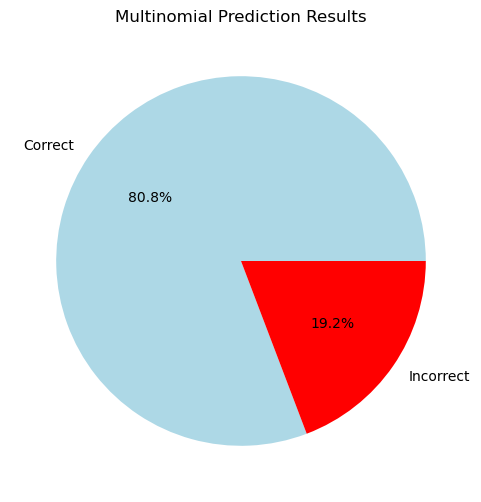

In [390]:
correct= sum(y_test == y_pred)
incorrect = len(y_test) - correct  

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['lightblue', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Multinomial Prediction Results')
plt.show()

In [399]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
cm

array([[    0,  1996,     0],
       [    0, 20425,  6229],
       [    0,  2507, 24696]], dtype=int64)

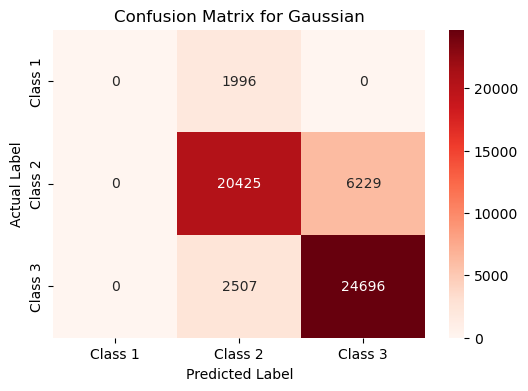

In [401]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Gaussian")
plt.show()

In [403]:
from sklearn.metrics import precision_score 
precision =precision_score(y_test,y_pred,average='macro')
precision 

C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5393123196692758

In [405]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test,y_pred,average='macro')
recall

0.5580475133842088

In [407]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="macro")
f1

0.5472179694952661

In [409]:
from sklearn.metrics import classification_report 
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1996
           2       0.82      0.77      0.79     26654
           3       0.80      0.91      0.85     27203

    accuracy                           0.81     55853
   macro avg       0.54      0.56      0.55     55853
weighted avg       0.78      0.81      0.79     55853



C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree (Model 4)


In [476]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier() 

In [477]:
model4

DecisionTreeClassifier()

In [480]:
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [481]:
y_pred = model4.predict(X_test)

In [482]:
y_pred

array([2, 2, 2, ..., 3, 2, 2], dtype=int64)

In [486]:
model4.score(X_test,y_pred)

1.0

In [488]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,y_pred) 
accuracy

1.0

In [490]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred) 
cm

array([[ 1996,     0,     0],
       [    0, 26654,     0],
       [    0,     0, 27203]], dtype=int64)

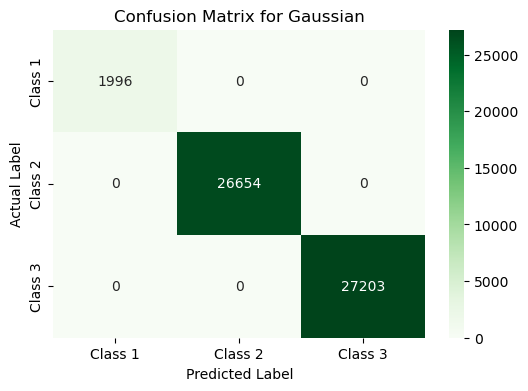

In [492]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Gaussian")
plt.show()

In [502]:
from sklearn.metrics import precision_score 
precision = precision_score(y_test,y_pred,average='macro')
precision

1.0

In [504]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test,y_pred,average='macro')
recall

1.0

In [506]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="macro")
f1

1.0

In [508]:
from sklearn.metrics import classification_report 
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1996
           2       1.00      1.00      1.00     26654
           3       1.00      1.00      1.00     27203

    accuracy                           1.00     55853
   macro avg       1.00      1.00      1.00     55853
weighted avg       1.00      1.00      1.00     55853



# Random Forest (Model 5)

In [510]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model5.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [511]:
y_pred = model5.predict(X_test)


In [512]:
y_pred

array([2, 2, 2, ..., 3, 2, 2], dtype=int64)

In [513]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [514]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred) 
cm

array([[ 1996,     0,     0],
       [    0, 26654,     0],
       [    0,     0, 27203]], dtype=int64)

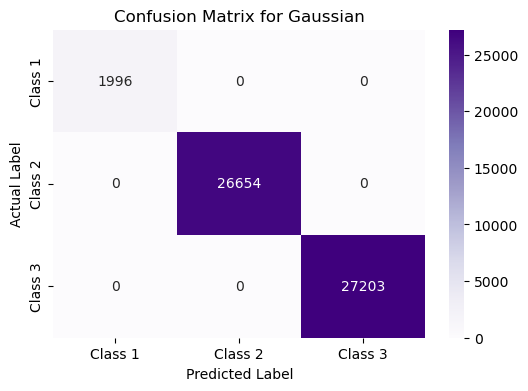

In [515]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap= "Purples", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Gaussian")
plt.show()

In [517]:
from sklearn.metrics import precision_score 
precision = precision_score(y_test,y_pred,average='macro')
precision

1.0

In [518]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test,y_pred,average='macro')
recall

1.0

In [519]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="macro")
f1

1.0

In [520]:
from sklearn.metrics import classification_report 
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1996
           2       1.00      1.00      1.00     26654
           3       1.00      1.00      1.00     27203

    accuracy                           1.00     55853
   macro avg       1.00      1.00      1.00     55853
weighted avg       1.00      1.00      1.00     55853



C:\Users\Rutuja\AppData\Local\Temp\ipykernel_10128\63345725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette="magma")


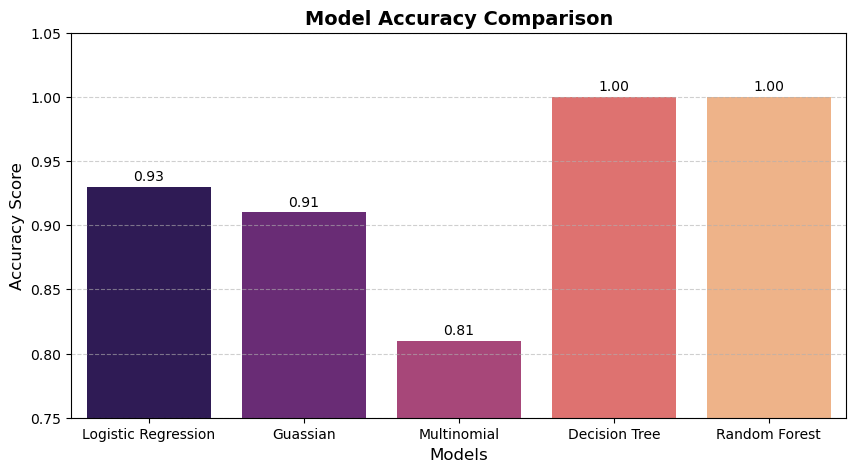

In [521]:
model_names = ['Logistic Regression', 'Guassian', 'Multinomial', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.93, 0.91, 0.81, 1.0, 1.0]  

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="magma")

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")

for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)

plt.ylim(0.75, 1.05)  
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


 # Underfitting and Overfitting

In [612]:
y_train_pred = model5.predict(X_train)
y_test_pred = model5.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 1.0
Testing Accuracy : 1.0


In [622]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 1.0
Testing Accuracy : 1.0
